In [ ]:
#cifar data set

In [ ]:
import numpy as np


In [ ]:
pred_arr= np.load("/content/drive/MyDrive/img_final_report/npy_files/pred_arr.npy")

In [ ]:
pred_arr.shape

(7301, 128, 128, 3)

In [ ]:
test_arr= np.load("/content/drive/MyDrive/img_final_report/npy_files/test_arr.npy")
test_arr.shape

(3000, 128, 128, 3)

In [ ]:
train_arr= np.load("/content/drive/MyDrive/img_final_report/npy_files/train_arr.npy")
train_arr.shape

(14034, 128, 128, 3)

In [ ]:
imgs= np.concatenate((pred_arr, test_arr, train_arr), axis=0)

In [ ]:
imgs.shape

(24335, 128, 128, 3)

In [ ]:
np.random.shuffle(train_arr)

In [ ]:
np.random.shuffle(test_arr)

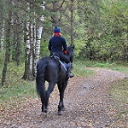

In [ ]:
cv2_imshow(imgs[0])

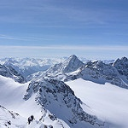

In [ ]:
cv2_imshow(imgs[1])

Data Preparation

In [ ]:
import cv2

In [ ]:
mask_test= cv2.imread("/content/drive/MyDrive/img_final_report/patches/patch_0.png")

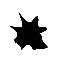

In [ ]:
cv2_imshow(mask_test)

In [ ]:
def add_mask(img, mask):
  #create mask 
  mask_patch = np.ones((128,128))
  mask_patch= 255*mask_patch
  
  #resize input mask
  mask= cv2.resize(mask, (32,32))
  
  #random coordinate
  x= np.random.randint(low=0, high=96)
  y= np.random.randint(low=0, high= 96)

  #get negative of mask
  mask= 255-mask
  mask=mask.astype(bool)

  #get area where mask is applied
  area=img[x:x+32, y:y+32]
  mask_area= mask_patch[x:x+32, y:y+32]
  idx=(mask==1)
  
  #change area
  area[idx]=255
  mask_area[idx[: ,:,0]]=0

  #set in image
  mask_patch[x:x+32, y:y+32]=mask_area
  img[x:x+32, y:y+32]=area

  return img , mask_patch

(128, 128)


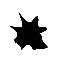

(32, 32, 3)
(32, 32)
(32, 32, 3)


In [ ]:
(patched_img, mask)=add_mask(imgs[0], mask_test) 

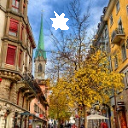

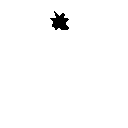

In [ ]:
cv2_imshow(patched_img)
cv2_imshow(mask)

In [ ]:
lst= [x for x in os.listdir("/content/drive/My Drive/img_final_report/patches")]
k=1
for filename in os.listdir("/content/drive/My Drive/ajanta_ellora"):
  img= cv2.imread("/content/drive/My Drive/ajanta_ellora/"+filename)
  img= cv2.resize(img, (256,256))

  cv2.imwrite('/content/drive/My Drive/unpatched_imgs/unpatched_img{}.png'.format(k), img)
  n= np.random.randint(low=1, high = 6)
  #print(filename)
  for i in range (n):
    mask_no= np.random.randint(low=0, high=len(lst))
    mask_name= lst[mask_no]
    mask= cv2.imread("/content/drive/My Drive/patches/"+mask_name)
    #print(mask_name)
    
    
    img=add_mask(img, mask)
    

  cv2.imwrite('/content/drive/My Drive/patched_imgs1/pathced_img{}.png'.format(k), img)
  k=k+1

In [ ]:
import os

In [ ]:
patches_list=[]
for k in os.listdir("/content/drive/MyDrive/img_final_report/patches"):
  patches_list.append(k)

In [ ]:
patches_list= np.array(patches_list)

In [ ]:
patches_list.dtype

dtype('<U12')

In [ ]:
import keras

In [ ]:
str(np.random.choice(patches_list,1)[0])

'patch_33.png'

In [ ]:
class createAugment(keras.utils.Sequence):
 # Generates masked_image, masks, and target images for training
  def __init__(self, X, y, patches, batch_size=32, dim=(128, 128),
    n_channels=3, shuffle=True):
      # Initialize the constructor
      self.batch_size = batch_size
      self.X = X
      self.y = y
      self.dim = dim
      self.n_channels = n_channels
      self.shuffle = shuffle
      self.patches=patches
      self.on_epoch_end()

  def __len__(self):
    # Denotes the number of batches per epoch
    return int(np.floor(len(self.X) / self.batch_size))

  def __getitem__(self, index):
    # Generate one batch of data
    indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
    # Generate data
    X_inputs, y_output = self.__data_generation(indexes)
    return X_inputs, y_output

  def on_epoch_end(self):
    # Updates indexes after each epoch
    self.indexes = np.arange(len(self.X))
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __createMask(self, img):
    ## Prepare masking matrix
    n= np.random.randint(1,5)
    img = img
    
    mask_patch = np.ones((128,128))
    mask_patch= 255*mask_patch
    
    #resize input mask
    
    for i in range(n):
      mask_path="/content/drive/MyDrive/img_final_report/patches/"+str(np.random.choice(patches_list,1)[0])

      mask = cv2.imread(mask_path)
      mask= cv2.resize(mask, (32,32))
      #random coordinate
      x= np.random.randint(low=0, high=96)
      y= np.random.randint(low=0, high= 96)

      #get negative of mask
      mask= 255-mask
      mask=mask.astype(bool)

      #get area where mask is applied
      area=img[x:x+32, y:y+32]
      mask_area= mask_patch[x:x+32, y:y+32]
      idx=(mask==1)
      
      #change area
      area[idx]=255
      mask_area[idx[: ,:,0]]=0

      #set in image
      mask_patch[x:x+32, y:y+32]=mask_area
      img[x:x+32, y:y+32]=area

    return img , mask_patch 

  def __data_generation(self, idxs):
    # Masked_images is a matrix of masked images used as input
    Masked_images = np.empty((self.batch_size, self.dim[0], self.dim[1], self.n_channels)) # Masked image
    # Mask_batch is a matrix of binary masks used as input
    Mask_batch = np.empty((self.batch_size, self.dim[0], self.dim[1])) # Binary Masks
    # y_batch is a matrix of original images used for computing error from reconstructed image
    y_batch = np.empty((self.batch_size, self.dim[0], self.dim[1], self.n_channels)) # Original image

    ## Iterate through random indexes
    for i, idx in enumerate(idxs):
      image_copy = self.X[idx].copy()
      ## Get mask associated to that image
      masked_image, mask = self.__createMask(image_copy)
      #
      
      ## Append and scale down.
      Masked_images[i,] = masked_image/255
      Mask_batch[i,] = mask/255
      y_batch[i] = self.y[idx]/255

    return [Masked_images, Mask_batch], y_batch


In [ ]:
traingen = createAugment(train_arr, train_arr, patches_list)

In [ ]:
valgen = createAugment(test_arr, test_arr, patches_list)

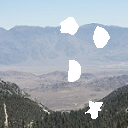

In [ ]:
cv2_imshow(255*traingen[0][0][0][0])

Metric for eavaluation

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import cv2 
import numpy as np 
from google.colab.patches import cv2_imshow
import os

In [ ]:
def dice_coef(y_true, y_pred):
   y_true_f = keras.backend.flatten(y_true)
   y_pred_f = keras.backend.flatten(y_pred)
   intersection = keras.backend.sum(y_true_f * y_pred_f)
   return (2. * intersection) / (keras.backend.sum(y_true_f + y_pred_f))

In [ ]:
class inpaintingModel:
  '''
  Build UNET like model for image inpaining task.
  '''
  def prepare_model(self, input_size=(128,128,3)):
    inputs = keras.layers.Input(input_size)

    conv1, pool1 = self.__ConvBlock(128, (3,3), (2,2), 'relu', 'same', inputs) 
    conv2, pool2 = self.__ConvBlock(256, (3,3), (2,2), 'relu', 'same', pool1)
    conv3, pool3 = self.__ConvBlock(512, (3,3), (2,2), 'relu', 'same', pool2) 
    conv4, pool4 = self.__ConvBlock(1024, (3,3), (2,2), 'relu', 'same', pool3) 
    
    conv5, up6 = self.__UpConvBlock(1024, 256, (3,3), (2,2), (2,2), 'relu', 'same', pool4, conv4)
    conv6, up7 = self.__UpConvBlock(512, 128, (3,3), (2,2), (2,2), 'relu', 'same', up6, conv3)
    conv7, up8 = self.__UpConvBlock(256, 64, (3,3), (2,2), (2,2), 'relu', 'same', up7, conv2)
    conv8, up9 = self.__UpConvBlock(128, 32, (3,3), (2,2), (2,2), 'relu', 'same', up8, conv1)
    
    conv9 = self.__ConvBlock(128, (3,3), (2,2), 'relu', 'same', up9, False)
    
    outputs = keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(conv9)

    return keras.models.Model(inputs=[inputs], outputs=[outputs])  

  def __ConvBlock(self, filters, kernel_size, pool_size, activation, padding, connecting_layer, pool_layer=True):
    conv = keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, activation=activation, padding=padding)(connecting_layer)
    conv = keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, activation=activation, padding=padding)(conv)
    if pool_layer:
      pool = keras.layers.MaxPooling2D(pool_size)(conv)
      return conv, pool
    else:
      return conv

  def __UpConvBlock(self, filters, up_filters, kernel_size, up_kernel, up_stride, activation, padding, connecting_layer, shared_layer):
    conv = keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, activation=activation, padding=padding)(connecting_layer)
    conv = keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, activation=activation, padding=padding)(conv)
    up = keras.layers.Conv2DTranspose(filters=up_filters, kernel_size=up_kernel, strides=up_stride, padding=padding)(conv)
    up = keras.layers.concatenate([up, shared_layer], axis=3)

    return conv, up

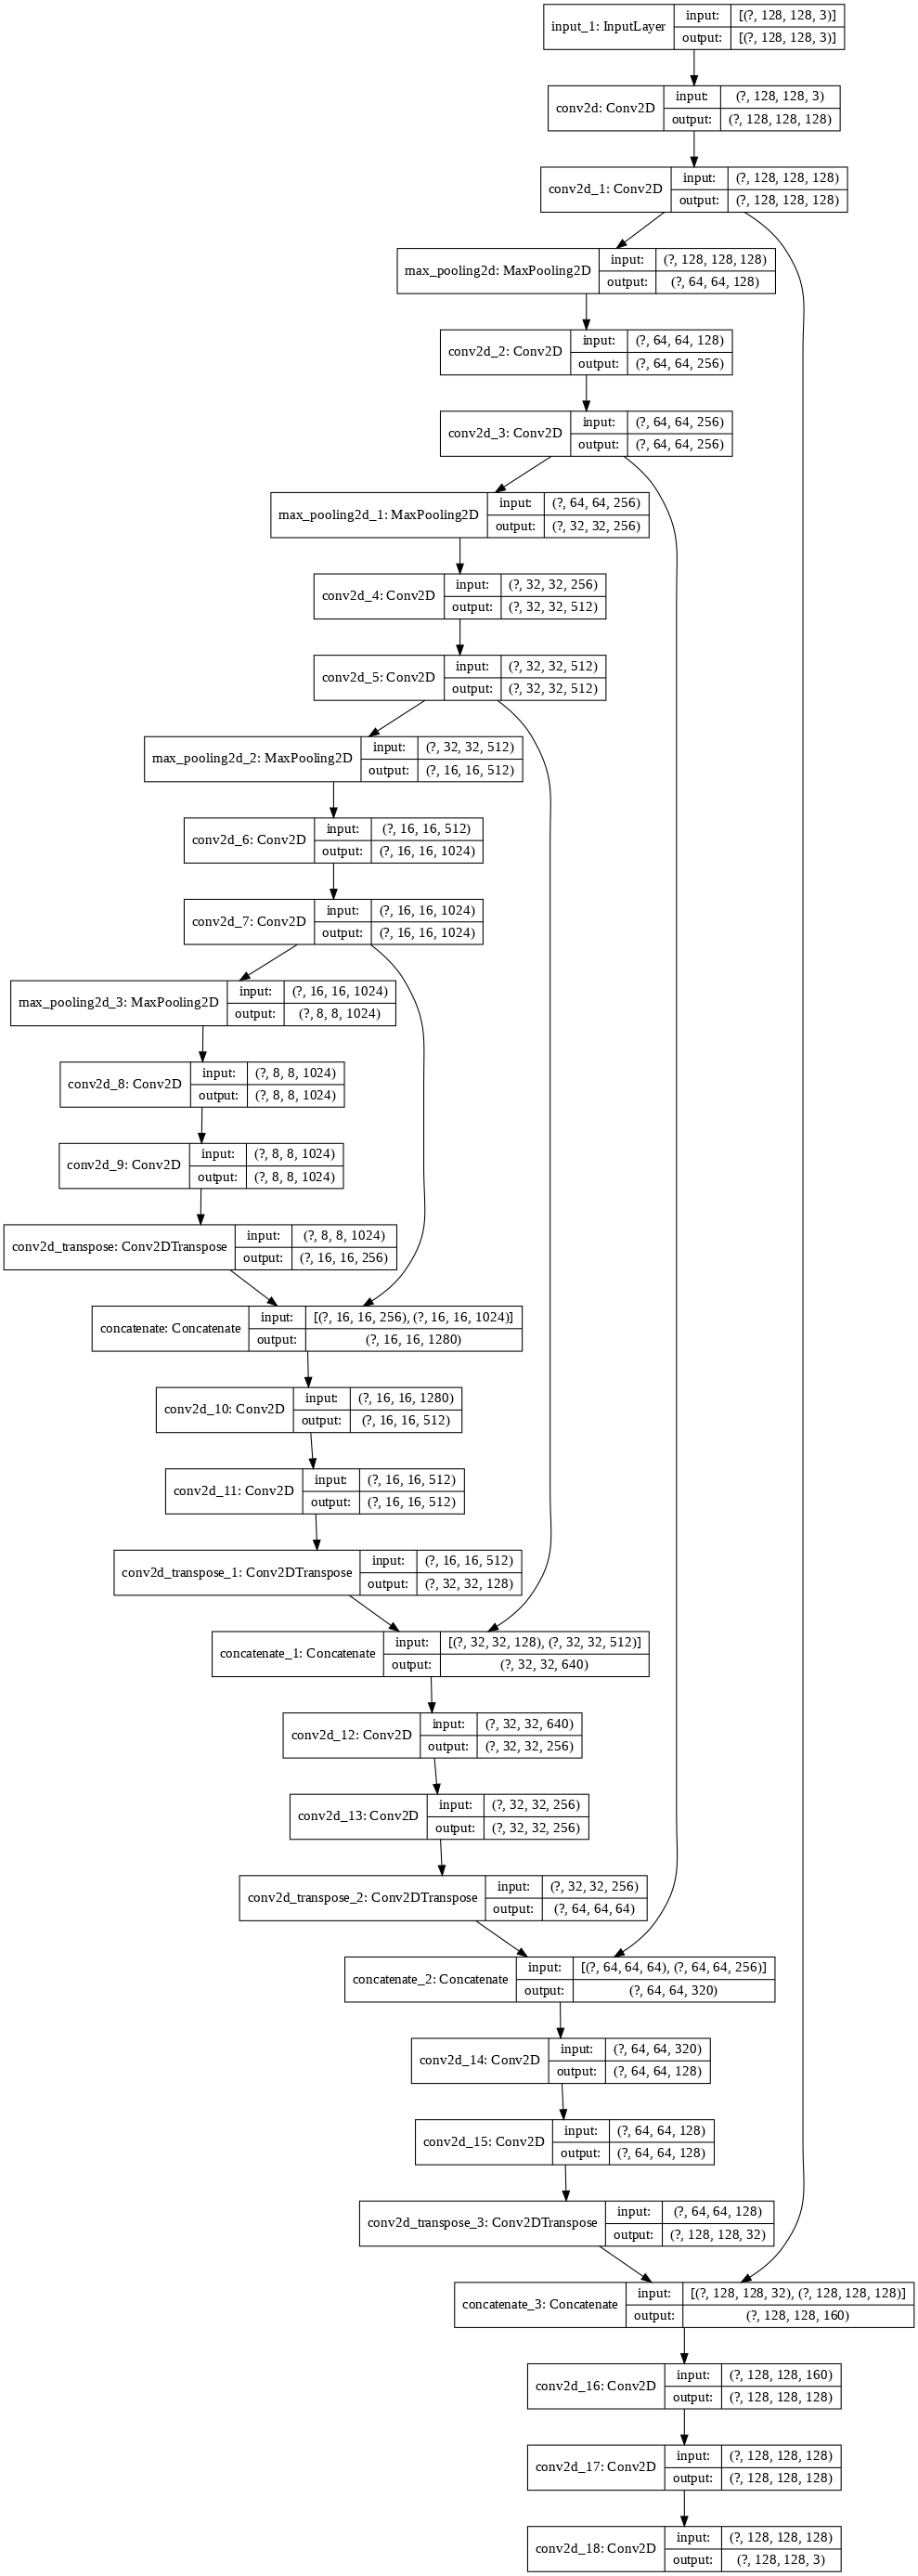

In [ ]:
keras.backend.clear_session()
model = inpaintingModel().prepare_model()
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=[dice_coef])
keras.utils.plot_model(model, show_shapes=True, dpi=76, to_file='model_v1.png')

In [ ]:
hist = model.fit(traingen, epochs=10, steps_per_epoch=len(traingen), )

Epoch 1/10
760/760 [==============================] - 242s 319ms/step - loss: 0.0075 - dice_coef: 0.6091
Epoch 2/10
760/760 [==============================] - 243s 319ms/step - loss: 0.0077 - dice_coef: 0.6092
Epoch 3/10
760/760 [==============================] - 243s 319ms/step - loss: 0.0074 - dice_coef: 0.6092
Epoch 4/10
760/760 [==============================] - 242s 319ms/step - loss: 0.0071 - dice_coef: 0.6092
Epoch 5/10
760/760 [==============================] - 243s 319ms/step - loss: 0.0095 - dice_coef: 0.6088
Epoch 6/10
760/760 [==============================] - 243s 319ms/step - loss: 0.0076 - dice_coef: 0.6091
Epoch 7/10
760/760 [==============================] - 243s 319ms/step - loss: 0.0073 - dice_coef: 0.6092
Epoch 8/10
760/760 [==============================] - 243s 319ms/step - loss: 0.0071 - dice_coef: 0.6091
Epoch 9/10
760/760 [==============================] - 243s 319ms/step - loss: 0.0068 - dice_coef: 0.6092
Epoch 10/10
760/760 [==============================] - 

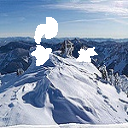

In [ ]:
cv2_imshow(255*traingen[0][0][0][0])

In [ ]:
impainted_image = model.predict(traingen[0][0][0][0].reshape(1,128,128,3))

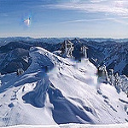

In [ ]:
cv2_imshow(255*impainted_image.reshape(128,128,3))

In [ ]:
model.save("model1.h5")

Model 2


- import data
- traingen/ testgen
- model architecture
- training
- prediction


In [ ]:
import numpy as np
import cv2
import keras
import os
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from google.colab.patches import cv2_imshow

In [ ]:
pred_arr= np.load("/content/drive/MyDrive/img_final_report/npy_files/pred_arr.npy")
test_arr= np.load("/content/drive/MyDrive/img_final_report/npy_files/test_arr.npy")
train_arr= np.load("/content/drive/MyDrive/img_final_report/npy_files/train_arr.npy")

In [ ]:
pred_arr.shape

(7301, 128, 128, 3)

In [ ]:
test_arr.shape

(3000, 128, 128, 3)

In [ ]:
patches_list=[]
for k in os.listdir("/content/drive/MyDrive/img_final_report/patches"):
  patches_list.append(k)
patches_list= np.array(patches_list)

In [ ]:
class createAugment(keras.utils.Sequence):
 # Generates masked_image, masks, and target images for training
  def __init__(self, X, y, patches, batch_size=32, dim=(128, 128),
    n_channels=3, shuffle=True):
      # Initialize the constructor
      self.batch_size = batch_size
      self.X = X
      self.y = y
      self.dim = dim
      self.n_channels = n_channels
      self.shuffle = shuffle
      self.patches=patches
      self.on_epoch_end()

  def __len__(self):
    # Denotes the number of batches per epoch
    return int(np.floor(len(self.X) / self.batch_size))

  def __getitem__(self, index):
    # Generate one batch of data
    indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
    # Generate data
    X_inputs, y_output = self.__data_generation(indexes)
    return X_inputs, y_output

  def on_epoch_end(self):
    # Updates indexes after each epoch
    self.indexes = np.arange(len(self.X))
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __createMask(self, img):
    ## Prepare masking matrix
    n= np.random.randint(1,5)
    img = img
    
    mask_patch = np.ones((128,128))
    mask_patch= 255*mask_patch
    
    #resize input mask
    
    for i in range(n):
      mask_path="/content/drive/MyDrive/img_final_report/patches/"+str(np.random.choice(patches_list,1)[0])

      mask = cv2.imread(mask_path)
      mask= cv2.resize(mask, (32,32))
      #random coordinate
      x= np.random.randint(low=0, high=96)
      y= np.random.randint(low=0, high= 96)

      #get negative of mask
      mask= 255-mask
      mask=mask.astype(bool)

      #get area where mask is applied
      area=img[x:x+32, y:y+32]
      mask_area= mask_patch[x:x+32, y:y+32]
      idx=(mask==1)
      
      #change area
      area[idx]=255
      mask_area[idx[: ,:,0]]=0

      #set in image
      mask_patch[x:x+32, y:y+32]=mask_area
      img[x:x+32, y:y+32]=area

    return img , mask_patch 

  def __data_generation(self, idxs):
    # Masked_images is a matrix of masked images used as input
    Masked_images = np.empty((self.batch_size, self.dim[0], self.dim[1], self.n_channels)) # Masked image
    # Mask_batch is a matrix of binary masks used as input
    Mask_batch = np.empty((self.batch_size, self.dim[0], self.dim[1])) # Binary Masks
    # y_batch is a matrix of original images used for computing error from reconstructed image
    y_batch = np.empty((self.batch_size, self.dim[0], self.dim[1], self.n_channels)) # Original image

    ## Iterate through random indexes
    for i, idx in enumerate(idxs):
      image_copy = self.X[idx].copy()
      ## Get mask associated to that image
      masked_image, mask = self.__createMask(image_copy)
      #
      
      ## Append and scale down.
      Masked_images[i,] = masked_image/255
      Mask_batch[i,] = mask/255
      y_batch[i] = self.y[idx]/255

    return [Masked_images, Mask_batch], y_batch


In [ ]:
def dice_coef(y_true, y_pred):
   y_true_f = keras.backend.flatten(y_true)
   y_pred_f = keras.backend.flatten(y_pred)
   intersection = keras.backend.sum(y_true_f * y_pred_f)
   return (2. * intersection) / (keras.backend.sum(y_true_f + y_pred_f))

In [ ]:
#pconv layer implementation


In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import InputSpec
from tensorflow.keras.layers import Conv2D


class PConv2D(Conv2D):
    def __init__(self, *args, n_channels=3, mono=False, **kwargs):
        super().__init__(*args, **kwargs)
        self.input_spec = [InputSpec(ndim=4), InputSpec(ndim=4)]

    def build(self, input_shape):        
        """Adapted from original _Conv() layer of Keras        
        param input_shape: list of dimensions for [img, mask]
        """
        
        if self.data_format == 'channels_first':
            channel_axis = 1
        else:
            channel_axis = -1
            
        if input_shape[0][channel_axis] is None:
            raise ValueError('The channel dimension of the inputs should be defined. Found `None`.')
            
        self.input_dim = input_shape[0][channel_axis]
        
        # Image kernel
        kernel_shape = self.kernel_size + (self.input_dim, self.filters)
        self.kernel = self.add_weight(shape=kernel_shape,
                                      initializer=self.kernel_initializer,
                                      name='img_kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        # Mask kernel
        self.kernel_mask = K.ones(shape=self.kernel_size + (self.input_dim, self.filters))

        # Calculate padding size to achieve zero-padding
        self.pconv_padding = (
            (int((self.kernel_size[0]-1)/2), int((self.kernel_size[0]-1)/2)), 
            (int((self.kernel_size[0]-1)/2), int((self.kernel_size[0]-1)/2)), 
        )

        # Window size - used for normalization
        self.window_size = self.kernel_size[0] * self.kernel_size[1]
        
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.filters,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.built = True

    def call(self, inputs, mask=None):
        '''
        We will be using the Keras conv2d method, and essentially we have
        to do here is multiply the mask with the input X, before we apply the
        convolutions. For the mask itself, we apply convolutions with all weights
        set to 1.
        Subsequently, we clip mask values to between 0 and 1
        ''' 

        # Both image and mask must be supplied
        if type(inputs) is not list or len(inputs) != 2:
            raise Exception('PartialConvolution2D must be called on a list of two tensors [img, mask]. Instead got: ' + str(inputs))

        # Padding done explicitly so that padding becomes part of the masked partial convolution
        images = K.spatial_2d_padding(inputs[0], self.pconv_padding, self.data_format)
        masks = K.spatial_2d_padding(inputs[1], self.pconv_padding, self.data_format)

        # Apply convolutions to mask
        mask_output = K.conv2d(
            masks, self.kernel_mask, 
            strides=self.strides,
            padding='valid',
            data_format=self.data_format,
            dilation_rate=self.dilation_rate
        )

        # Apply convolutions to image
        img_output = K.conv2d(
            (images*masks), self.kernel, 
            strides=self.strides,
            padding='valid',
            data_format=self.data_format,
            dilation_rate=self.dilation_rate
        )        

        # Calculate the mask ratio on each pixel in the output mask
        mask_ratio = self.window_size / (mask_output + 1e-8)

        # Clip output to be between 0 and 1
        mask_output = K.clip(mask_output, 0, 1)

        # Remove ratio values where there are holes
        mask_ratio = mask_ratio * mask_output

        # Normalize iamge output
        img_output = img_output * mask_ratio

        # Apply bias only to the image (if chosen to do so)
        if self.use_bias:
            img_output = K.bias_add(
                img_output,
                self.bias,
                data_format=self.data_format)
        
        # Apply activations on the image
        if self.activation is not None:
            img_output = self.activation(img_output)
            
        return [img_output, mask_output]
    
    def compute_output_shape(self, input_shape):
        if self.data_format == 'channels_last':
            space = input_shape[0][1:-1]
            new_space = []
            for i in range(len(space)):
                new_dim = conv_output_length(
                    space[i],
                    self.kernel_size[i],
                    padding='same',
                    stride=self.strides[i],
                    dilation=self.dilation_rate[i])
                new_space.append(new_dim)
            new_shape = (input_shape[0][0],) + tuple(new_space) + (self.filters,)
            return [new_shape, new_shape]
        if self.data_format == 'channels_first':
            space = input_shape[2:]
            new_space = []
            for i in range(len(space)):
                new_dim = conv_output_length(
                    space[i],
                    self.kernel_size[i],
                    padding='same',
                    stride=self.strides[i],
                    dilation=self.dilation_rate[i])
                new_space.append(new_dim)
            new_shape = (input_shape[0], self.filters) + tuple(new_space)
            return [new_shape, new_shape]

## Reference: https://github.com/keras-team/keras/blob/7a39b6c62d43c25472b2c2476bd2a8983ae4f682/keras/utils/conv_utils.py#L85
    def conv_output_length(input_length, filter_size,
                          padding, stride, dilation=1):
        """Determines output length of a convolution given input length.
        # Arguments
            input_length: integer.
            filter_size: integer.
            padding: one of `"same"`, `"valid"`, `"full"`.
            stride: integer.
            dilation: dilation rate, integer.
        # Returns
            The output length (integer).
        """
        if input_length is None:
            return None
        assert padding in {'same', 'valid', 'full', 'causal'}
        dilated_filter_size = (filter_size - 1) * dilation + 1
        if padding == 'same':
            output_length = input_length
        elif padding == 'valid':
            output_length = input_length - dilated_filter_size + 1
        elif padding == 'causal':
            output_length = input_length
        elif padding == 'full':
            output_length = input_length + dilated_filter_size - 1
        return (output_length + stride - 1) // stride

In [ ]:
traingen = createAugment(train_arr,train_arr , patches_list)

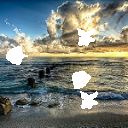

In [ ]:
cv2_imshow(255*traingen[0][0][0][0])

In [ ]:
valgen = createAugment(test_arr, test_arr, patches_list)

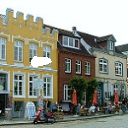

In [ ]:
cv2_imshow(255*valgen[0][0][0][0])

In [ ]:
class inpaintingModel:
  '''
  Build UNET like model for image inpaining task.
  '''
  def prepare_model(self, input_size=(128,128,3)):
    input_image = keras.layers.Input(input_size)
    input_mask = keras.layers.Input(input_size)

    conv1, mask1, conv2, mask2 = self.__encoder_layer(128, input_image, input_mask)
    conv3, mask3, conv4, mask4 = self.__encoder_layer(256, conv2, mask2)
    conv5, mask5, conv6, mask6 = self.__encoder_layer(512, conv4, mask4)
    conv7, mask7, conv8, mask8 = self.__encoder_layer(1024, conv6, mask6)

    conv9, mask9, conv10, mask10 = self.__decoder_layer(1024, 512, conv8, mask8, conv7, mask7)
    conv11, mask11, conv12, mask12 = self.__decoder_layer(512, 256, conv10, mask10, conv5, mask5)
    conv13, mask13, conv14, mask14 = self.__decoder_layer(256,128, conv12, mask12, conv3, mask3)
    conv15, mask15, conv16, mask16 = self.__decoder_layer(128, 3, conv14, mask14, conv1, mask1)

    outputs = keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(conv16)

    return keras.models.Model(inputs=[input_image, input_mask], outputs=[outputs]) 

  def __encoder_layer(self, filters, in_layer, in_mask):
    conv1, mask1 = PConv2D(128, (3,3), strides=1, padding='same')([in_layer, in_mask])
    conv1 = keras.activations.relu(conv1)

    conv2, mask2 = PConv2D(128, (3,3), strides=2, padding='same')([conv1, mask1])
    conv2 = keras.layers.BatchNormalization()(conv2, training=True)
    conv2 = keras.activations.relu(conv2)

    return conv1, mask1, conv2, mask2

  def __decoder_layer(self, filter1, filter2, in_img, in_mask, share_img, share_mask):
    up_img = keras.layers.UpSampling2D(size=(2,2))(in_img)
    up_mask = keras.layers.UpSampling2D(size=(2,2))(in_mask)
    concat_img = keras.layers.Concatenate(axis=3)([share_img, up_img])
    concat_mask = keras.layers.Concatenate(axis=3)([share_mask, up_mask])

    conv1, mask1 = PConv2D(filter1, (3,3), padding='same')([concat_img, concat_mask])
    conv1 = keras.activations.relu(conv1)

    conv2, mask2 = PConv2D(filter2, (3,3), padding='same')([conv1, mask1])
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.activations.relu(conv2)

    return conv1, mask1, conv2, mask2

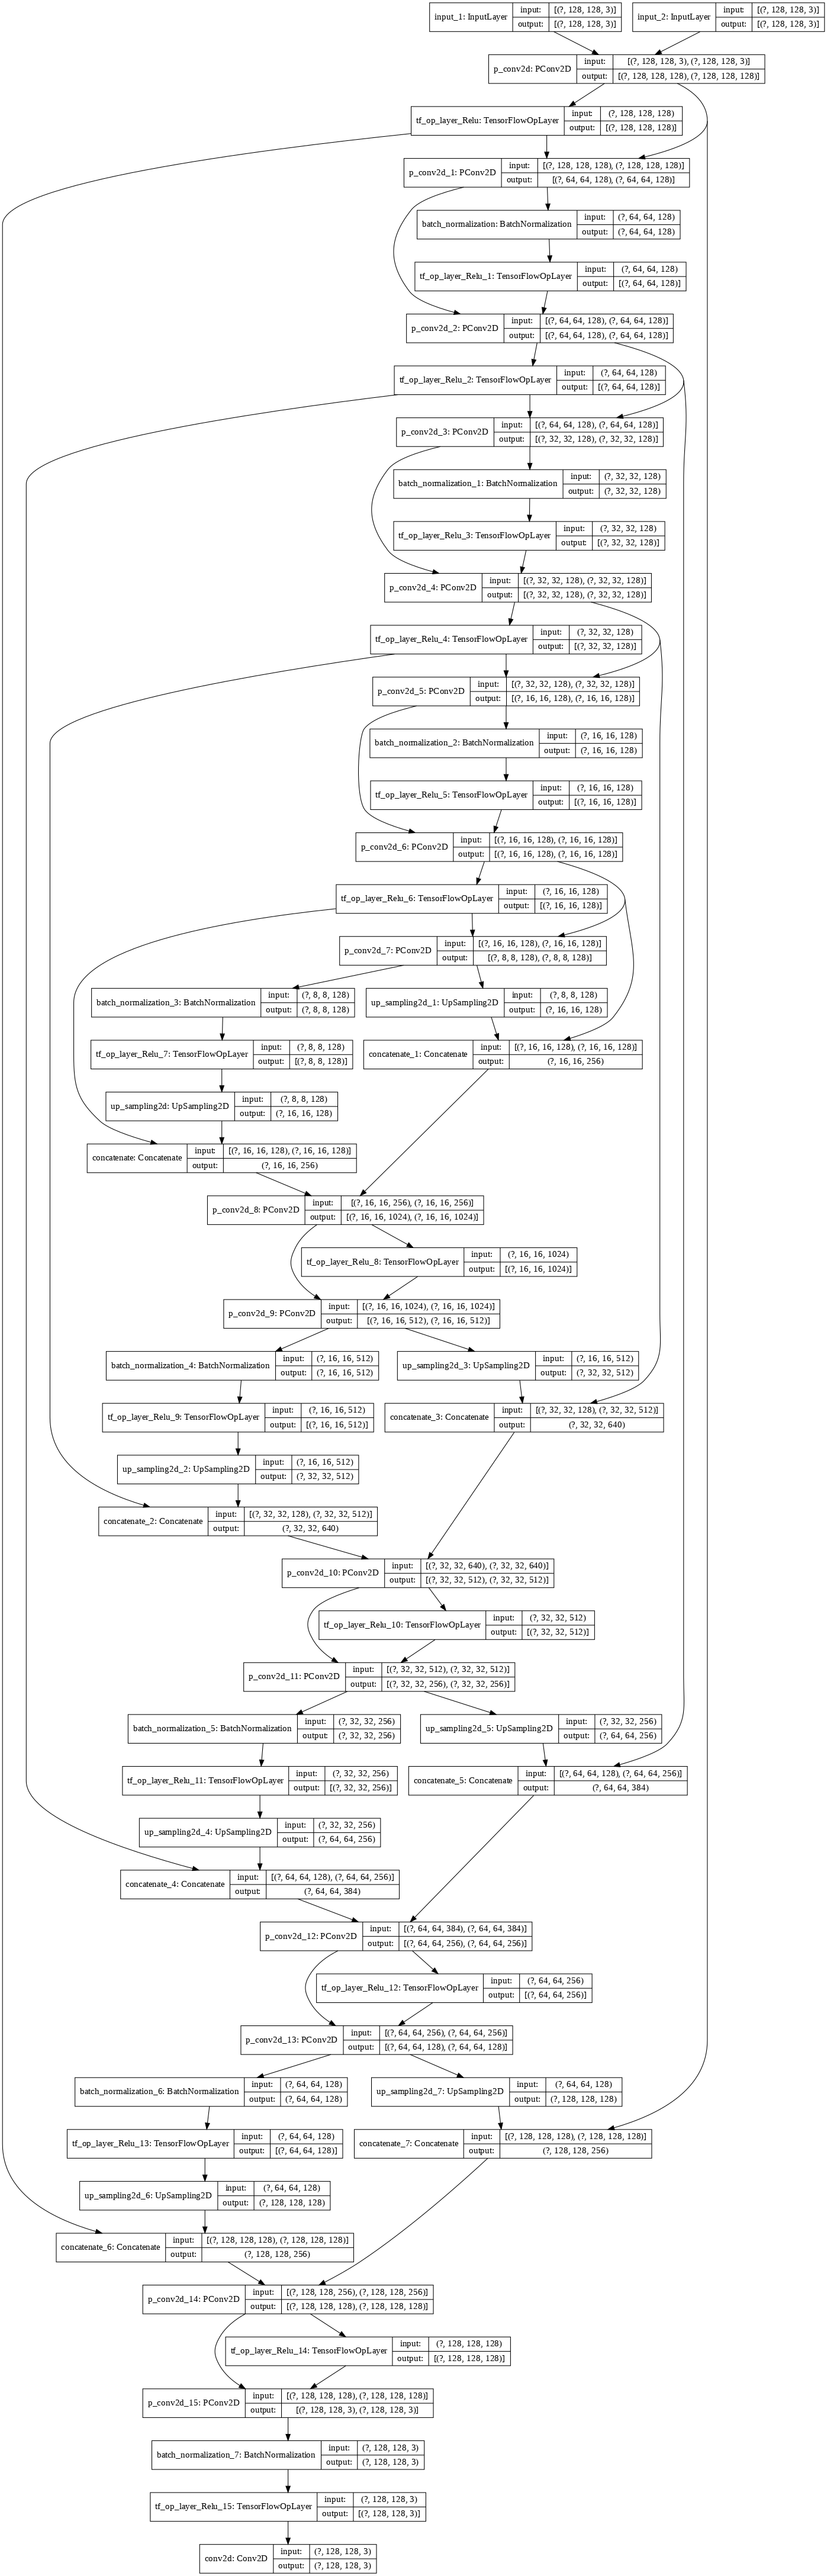

In [ ]:
keras.backend.clear_session()
model = inpaintingModel().prepare_model()
model.compile(optimizer='adam', loss='mean_square_error', metrics=[dice_coef])
keras.utils.plot_model(model, show_shapes=True, dpi=76, to_file='model_v2.png')

In [ ]:
traingen.shape

AttributeError: ignored

In [ ]:
_ = model.fit(traingen, 
          validation_data=valgen, 
          epochs=20, 
          steps_per_epoch=len(traingen), 
          validation_steps=len(valgen))

Epoch 1/20
438/438 [==============================] - 296s 676ms/step - loss: 0.0483 - dice_coef: 0.5983 - val_loss: 0.0328 - val_dice_coef: 0.6070
Epoch 2/20
438/438 [==============================] - 294s 671ms/step - loss: 0.0281 - dice_coef: 0.6069 - val_loss: 0.0254 - val_dice_coef: 0.6062
Epoch 3/20
438/438 [==============================] - 289s 660ms/step - loss: 0.0309 - dice_coef: 0.6050 - val_loss: 0.0227 - val_dice_coef: 0.6129
Epoch 4/20
438/438 [==============================] - 285s 652ms/step - loss: 0.0233 - dice_coef: 0.6073 - val_loss: 0.0267 - val_dice_coef: 0.6210
Epoch 5/20
438/438 [==============================] - 285s 651ms/step - loss: 0.0178 - dice_coef: 0.6071 - val_loss: 0.0130 - val_dice_coef: 0.6079
Epoch 6/20
438/438 [==============================] - 286s 653ms/step - loss: 0.0137 - dice_coef: 0.6073 - val_loss: 0.0132 - val_dice_coef: 0.6137
Epoch 7/20
438/438 [==============================] - 285s 652ms/step - loss: 0.0138 - dice_coef: 0.6074 - val_l

In [ ]:
impainted_image = model.predict(traingen[0][0][0][2].reshape(1,128,128,3))

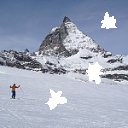

In [ ]:
cv2_imshow(255*traingen[0][0][0][2])

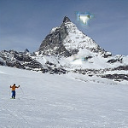

In [ ]:
cv2_imshow(255*(impainted_image.reshape(128,128,3)))

In [ ]:
model.save('model_v2.h5')


Testing model1 -normal





In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model
model= load_model("/content/drive/MyDrive/img_final_report/model1.h5", compile=False )

In [ ]:
import cv2

In [ ]:
testgen = createAugment(pred_arr, pred_arr, patches_list)

In [ ]:
impainted_image = model.predict(traingen[0][0][0][2].reshape(1,128,128,3))


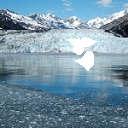

In [ ]:
cv2_imshow(255*traingen[0][0][0][2])

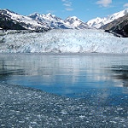

In [ ]:
cv2_imshow(255*(impainted_image.reshape(128,128,3)))

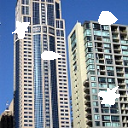

In [ ]:
cv2_imshow(255*testgen[0][0][0][0])

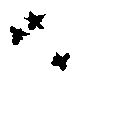

In [ ]:
cv2_imshow(255*testgen[0][0][1][0])

In [ ]:
sample_images, sample_labels = testgen[3]

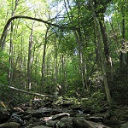

In [ ]:
cv2_imshow(255*sample_labels[0]) #ground truth

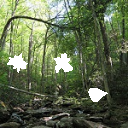

In [ ]:
cv2_imshow(255*sample_images[0][0]) #masked

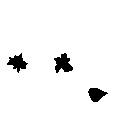

In [ ]:
cv2_imshow(255*sample_images[1][0]) #mask

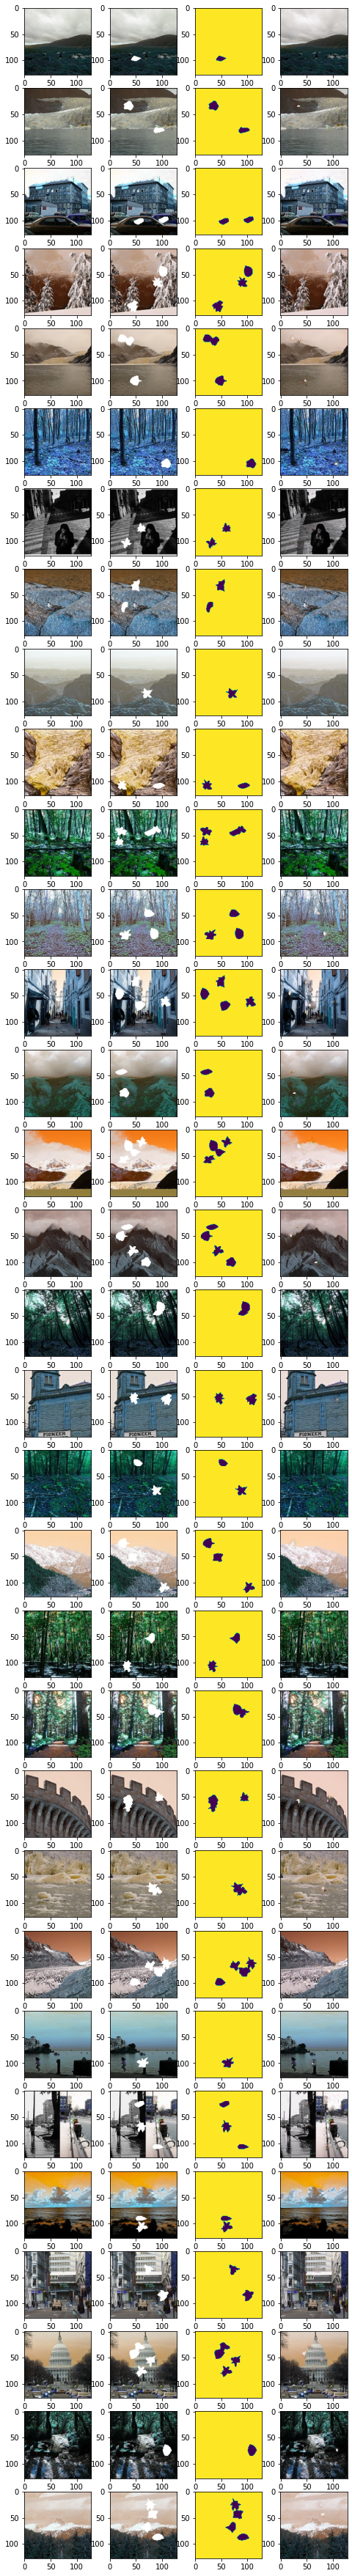

In [ ]:
rows = 32
sample_idx = 54
sample_images, sample_labels = testgen[sample_idx]

fig, axs = plt.subplots(nrows=rows, ncols=4, figsize=(8, 2*rows))

for i in range(32):
  impainted_image = model.predict(sample_images[0][i].reshape(1,128,128,3))
  axs[i][0].imshow((255*sample_labels[i]).astype(np.uint8))
  axs[i][1].imshow((255*sample_images[0][i]).astype(np.uint8))
  axs[i][2].imshow(sample_images[1][i])
  axs[i][3].imshow((255*impainted_image.reshape(128,128,3)).astype(np.uint8))

plt.show()

Testing model2

In [ ]:
model2= load_model("/content/drive/MyDrive/img_final_report/model_v2.h5", compile=False )

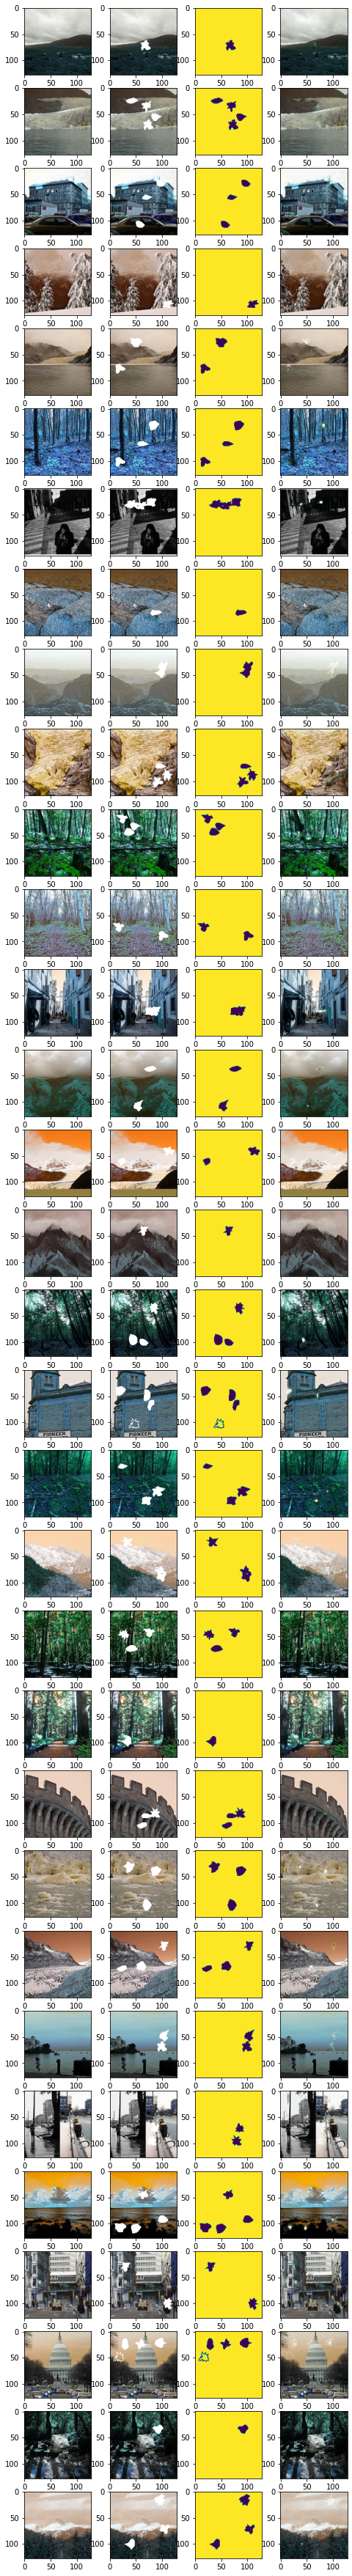

In [ ]:
rows = 32
sample_idx = 54
sample_images, sample_labels = testgen[sample_idx]

fig, axs = plt.subplots(nrows=rows, ncols=4, figsize=(8, 2*rows))

for i in range(32):
  impainted_image = model2.predict(sample_images[0][i].reshape(1,128,128,3))
  axs[i][0].imshow((255*sample_labels[i]).astype(np.uint8))
  axs[i][1].imshow((255*sample_images[0][i]).astype(np.uint8))
  axs[i][2].imshow(sample_images[1][i])
  axs[i][3].imshow((255*impainted_image.reshape(128,128,3)).astype(np.uint8))

plt.show()